<a href="https://colab.research.google.com/github/roan-varghese/DjangoUnlimited/blob/master/dl_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Deep Learning**
### *Michaela Buchanan - Mark III Systems*

---
Imports for all the code below. Please run first before anything else!


In [ ]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from skimage import color
from skimage import io

from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam

2.12.0




---
### Introduction


In this workshop we will be working with the CIFAR-10 dataset which consists of 10 classes of images. Our goal is to create a model that can classify images into these 10 categories. To do this, we will be experimenting with building a deep neural network using Tensorflow Keras. While this neural network will be very basic in comparison to many common algorithms used today, it should serve as a good starting point for learning about how to implement deep learning algorithms in Python.

---
### Data Analysis and Preprocessing

The 10 classes in CIFAR are denoted by numbers in our Y variables. The list of classes and their associated numbers can be found below:

```
0.   airplane
1.   automobile
2.   bird
3.   cat
4.   deer
5.   dog
6.   frog
7.   horse
8.   ship
9.   truck
```
Knowing the dimensions of our images and the number of entries in our dataset are both important for correctly setting up our neural network. All of our images need to be the same size so we have the same number of neurons in the input layer of our model. This shouldn't be a problem with this dataset as all the images are uniform but it is a caveat you will have to watch out for with your own datasets. Let's start by taking a look at our CIFAR-10 dataset.


170498071/170498071 [==============================] - 14s 0us/step
[1]


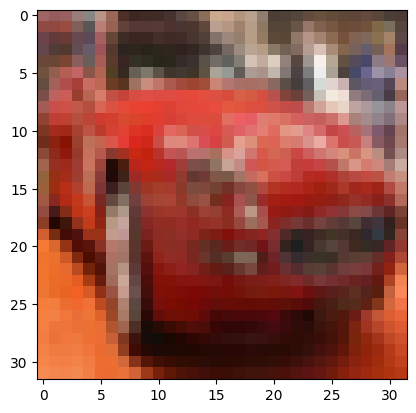

In [ ]:
# Load in our dataset from Keras
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Use matplotlib to show sample image
print(y_train[5])
plt.imshow(x_train[5])

If you look above, we got the number 1 when we printed the y associated with our image we displayed. This makes sense as we are looking at an image of a car, and according to the list above the image should be in the automobile class. The low resolution is nothing to be alarmed about. CIFAR-10 images are purposely low resolution in order to keep the size of the input layer reasonable as this dataset is primarily for people looking to learn how to use DL, not real world model training. Feel free to look at different images in the dataset by replacing the number 5 in these two lines with another number.



Now we need to figure out some important information about our dataset. Let's start by checking the dimensions of the images we are using.

In [ ]:
print("single image shape: ",x_train[5].shape)
print("training dataset shape: ", x_train.shape)

single image shape:  (32, 32, 3)
training dataset shape:  (50000, 32, 32, 3)


Our model isn't going to know what to do with integer output for our Y like we have now so we need to convert it to one-hot encoding. One-hot encoding creates an array that has the lenght of the number of options we have. Then we set 1 to the corresponding category of the entry we are dealing with and the rest to 0. This will probably make more sense when you take a look at the example below.

In [ ]:
# creates and formate one-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)

# actually one-hot encodes our data
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

print(y_train[5])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Here you can see for our 5th training sample, the 1 spot (remember we start counting at 0) has a 1 in it while the rest of the spots in the array are 0. This gives us the same information the Y did previously but in a format that will be much easier for the model to associate with the 10 output neurons we will be creating.

Our x entries are going to consist of three numbers ranging from 0-255 representing the RGB of that pixel. Since we know this, we can easily normalize our data so that it's easier to train with.

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

---
### Creating our Model



Now it's time to start creating our neural network. Luckily, Keras makes this pretty easy, especially when you are using what's called a Sequencial model which is what we will be doing today. With a Sequential Keras model, all you need to do is initialize the model and then add layers to it using premade functions in Keras as you will see in a minute. Sequential models are great for situations where you have only one input and one output vector and you are not planning on doing any layer sharing and are sticking to a linear model topology. To start with, let's define some of the variables we need. First we have our batch size which designates how many training samples we go through before we backpropogate changes through the model. Then we have epochs which is how many times we go through the whole dataset. Feel free to change these variables to see what happens. You can do as many or as few epochs but batch_size must be 1 < batch_size < 50,000 since we have 50,000 entries in x_train. num_classes just defines how many categories we have that we are classifying into in our output layer.

In [ ]:
# feel free to experiment with these
batch = 32
num_epochs = 20

# don't touch this unless using a different dataset
num_classes = 10

Let's create our model.

In [ ]:
# initialize model
model = Sequential()

model.add(Conv2D(input_shape=x_train[0,:,:,:].shape, filters=96, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=2, activation='relu'))
model.add(Conv2D(filters=192, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=192, kernel_size=(3,3), strides=2, activation='relu'))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        83040     
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 192)       166080    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 192)         331968    
                                                                 
 flatten (Flatten)           (None, 4800)              0         
                                                                 
 batch_normalization (BatchN  (None, 4800)             19200     
 ormalization)                                                   
                                                        

The last line prints a nice summary of the model we have created and the output shapes from each layer. If you are having trouble getting your data to flow through your layers, this model summary can be a great tool for debugging your model. Now that we have defined our model structure, we can use Keras to compile it.

In [ ]:
# feel free to experiment with the learning_rate
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['acc'])

And finally we can start training our model. To do this, all we have to do is run the fit function on our model as shown below.



In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch,
    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 25s 9ms/step - loss: 1.4170 - acc: 0.4949 - val_loss: 1.1845 - val_acc: 0.5831
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0352 - acc: 0.6381 - val_loss: 1.1398 - val_acc: 0.6029
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8261 - acc: 0.7139 - val_loss: 0.9663 - val_acc: 0.6676
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6715 - acc: 0.7700 - val_loss: 0.8895 - val_acc: 0.6935
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5405 - acc: 0.8166 - val_loss: 0.9070 - val_acc: 0.6974
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4328 - acc: 0.8535 - val_loss: 0.8375 - val_acc: 0.7260
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3373 - acc: 0.8899 - val_loss: 0.9624 - val_acc: 0.7008
Epoch 8/20
1563/1563 [==============================] 

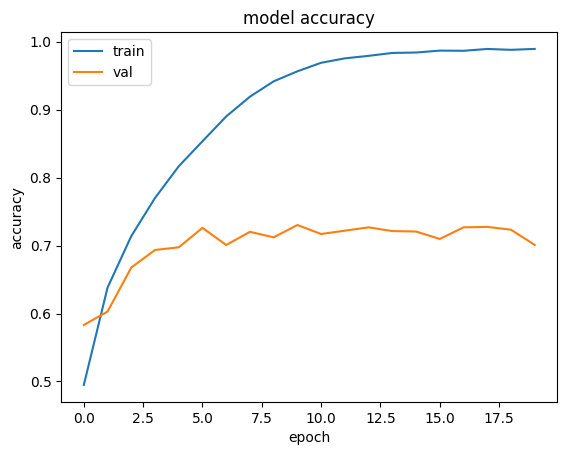

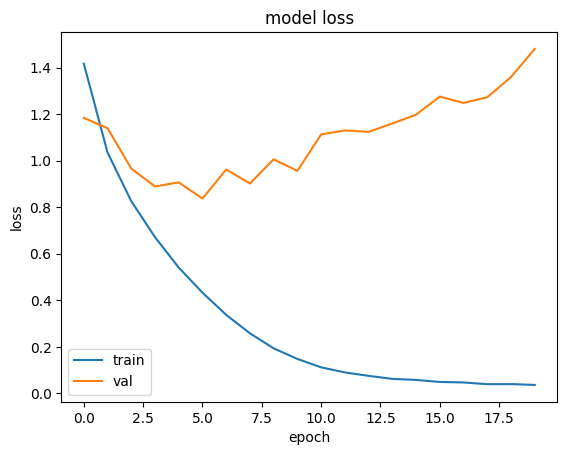

In [ ]:
#  Ploting the accuracy graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

As you can see, our accuracy and loss look great for our training data. However, the same cannot be said for our validation data. This is usually a red flag that our model is overfitting to our training data. In the next section, we are going to make some changes to this model to see if we can get the ovefitting under control.



---

###Improving our Model

Below is a very similar model to the one we created earlier. The only difference is the addition of 2 dropout layers. Dropout layers will ignore a random selection of neurons during training which can help with overfitting.

In [ ]:
model2 = Sequential()

model2.add(Conv2D(input_shape=x_train[0,:,:,:].shape, filters=96, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(filters=96, kernel_size=(3,3), strides=2, activation='relu'))

# added dropout layer
model2.add(Dropout(0.2))
model2.add(Conv2D(filters=192, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(filters=192, kernel_size=(3,3), strides=2, activation='relu'))

# added dropout layer
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(num_classes, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 96)        2688      
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 96)        83040     
                                                                 
 dropout (Dropout)           (None, 14, 14, 96)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 192)       166080    
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 192)         331968    
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 192)         0         
                                                                 
 flatten_1 (Flatten)         (None, 4800)             

Let's try training this model with our dropout layers to see if it helps with our overfitting issue.

In [ ]:
history2 = model2.fit(
    x_train,
    y_train,
    epochs=num_epochs,
    batch_size=batch,
    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 18s 9ms/step - loss: 1.6507 - accuracy: 0.3964 - val_loss: 1.3749 - val_accuracy: 0.4972
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3376 - accuracy: 0.5172 - val_loss: 1.2916 - val_accuracy: 0.5556
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1960 - accuracy: 0.5758 - val_loss: 1.1727 - val_accuracy: 0.5760
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0961 - accuracy: 0.6107 - val_loss: 1.1068 - val_accuracy: 0.6098
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0184 - accuracy: 0.6401 - val_loss: 0.9095 - val_accuracy: 0.6782
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9569 - accuracy: 0.6631 - val_loss: 0.8944 - val_accuracy: 0.6864
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9118 - accuracy: 0.6807 - val_loss: 0.9295 - val_a

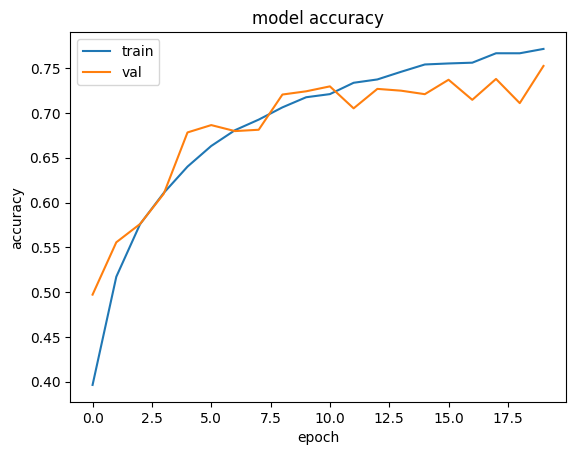

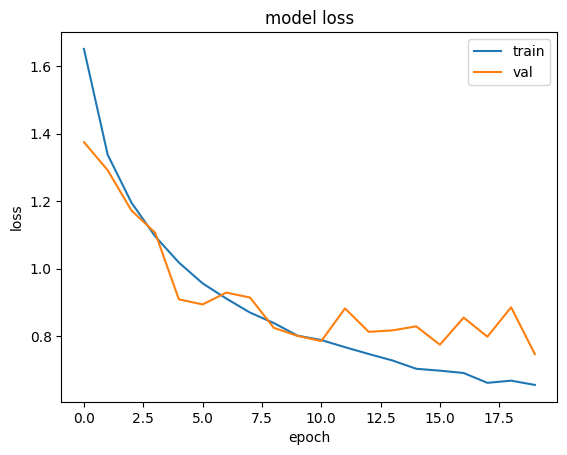

In [ ]:
#  Ploting the accuracy graph
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# Ploting the loss graph
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

As you can see, the dropout layers were very helpful with curbing the model's overfitting tendencies. The training and validation accuracies were much more in line with each other. We did take a bit of a hit in training accuracy but the accuracy we achieved in our earlier model wasn't very meaningful anyway since it didn't generalize to data outside of the training set.